# Support Vector Machine


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


**DATA PREPROCESSING**

In [2]:
df = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# checking if there is any missing value
df.isnull().sum().max()
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**TARGET VALUE ANALYSIS**

In [4]:
#understanding the predicted value - which is hot encoded, in real life price won't be hot encoded.
df['price_range'].describe(), df['price_range'].unique()

# there are 4 classes in the predicted value

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64, array([1, 2, 3, 0]))

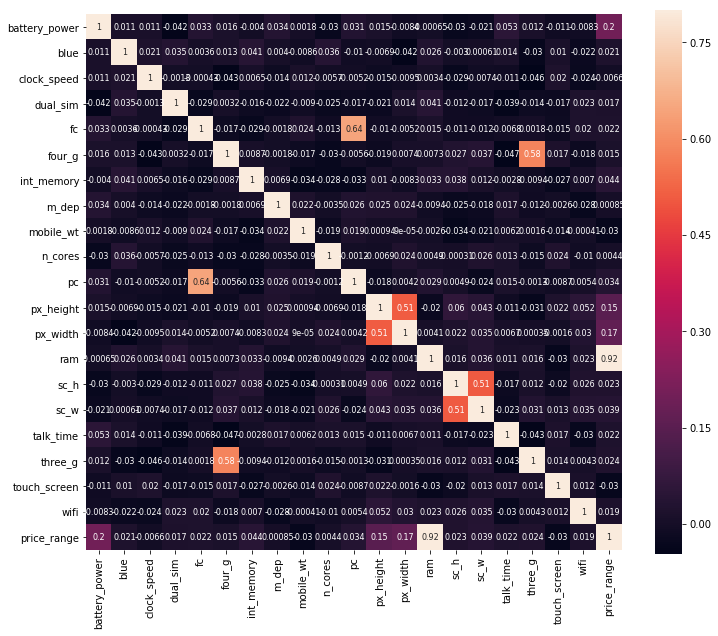

In [5]:
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

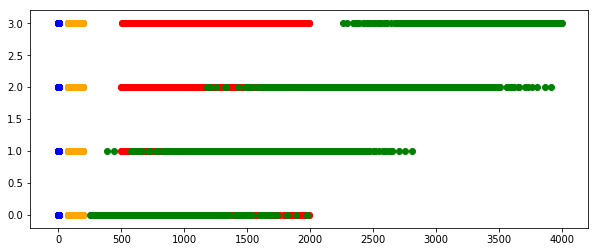

In [6]:
f, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'],x=df['battery_power'],color='red')
plt.scatter(y=df['price_range'],x=df['ram'],color='Green')
plt.scatter(y=df['price_range'],x=df['n_cores'],color='blue')
plt.scatter(y=df['price_range'],x=df['mobile_wt'],color='orange')
# clearly we can see that each of the category has different set of value ranges 

In [7]:
# Try plots using seaborn
#sns.swarmplot(x='battery_power',y='ram',data=df,hue='price_range')
#plt.show()

In [8]:
#sns.pairplot(df,size=2.5)
#plt.show()

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(df['price_range'])
X_t = df
X_t = df.drop(['price_range'],axis=1)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(2000,)
shape of X :(2000, 20)


In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [11]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [12]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))
#print("The LeaveOneOut Cross Validation Score :"+str(Loo_scores))
#print("The Average LeaveOneOut Cross Validation Score :"+str(Loo_scores.mean()))

The Cross Validation Score :[0.95015576 0.96261682 0.94392523 0.92789969 0.97169811]
The Average Cross Validation Score :0.9512591238085129
The Stratified Cross Validation Score :[0.95327103 0.96884735 0.95015576 0.96551724 0.95597484]
The Average Stratified Cross Validation Score :0.9587532454897574


In [13]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.24
Test Stratergy :stratified 
 Score :0.28
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.24
Test Stratergy :uniform 
 Score :0.27


In [14]:
# plotting the decision boundries for the data 
#converting the data to array for plotting. 
X = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

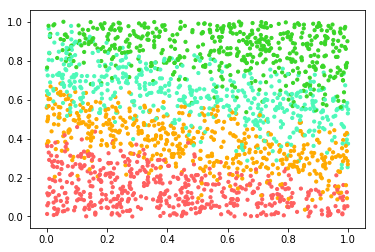

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

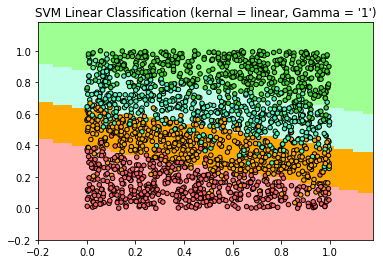

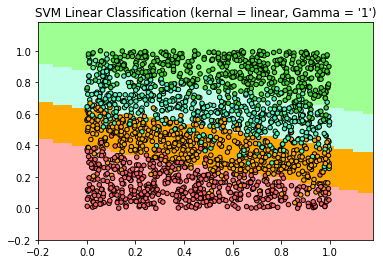

In [17]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [18]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.825


In [19]:
# Linear Support vector machine with only C Parameter 
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))



Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 

Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 

Linear SVM value of C:5, training score :0.867500 , Test Score: 0.870000 

Linear SVM value of C:10, training score :0.874375 , Test Score: 0.875000 

Linear SVM value of C:40, training score :0.872500 , Test Score: 0.865000 

Linear SVM value of C:60, training score :0.835625 , Test Score: 0.845000 

Linear SVM value of C:80, training score :0.845000 , Test Score: 0.850000 

Linear SVM value of C:100, training score :0.734375 , Test Score: 0.750000 



Apparently we got better scores with SVC where we defined the kernal as linear than with just LinearSVC

The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs.
1. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n).

The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick.
1. The training time complexity is usually between O(m2 × n) and O(m3 × n). 
1. LinearSVC is much faster than SVC(kernel="linear")


In [20]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.92 is the accuracy of the SV Regressor


* SVM supports linear and nonlinear regression.
* SVM Regression tries to fit as many instances as possible on the decision boundary while limiting margin violations.
* The width of the decision boundary is controlled by a hyperparameter ϵ. 


**NON LINEAR SVM **



In [21]:
# SMV with RBF KERNAL AND ONLY C PARAMETER 

for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.902500 Test Score : 0.887500

SVM for Non Linear 
 C:5 Training Score : 0.957500 Test Score : 0.927500

SVM for Non Linear 
 C:10 Training Score : 0.963750 Test Score : 0.927500

SVM for Non Linear 
 C:25 Training Score : 0.979375 Test Score : 0.927500

SVM for Non Linear 
 C:50 Training Score : 0.986250 Test Score : 0.925000

SVM for Non Linear 
 C:100 Training Score : 0.993125 Test Score : 0.920000



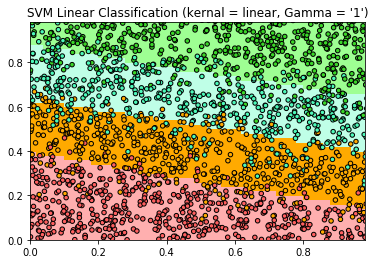

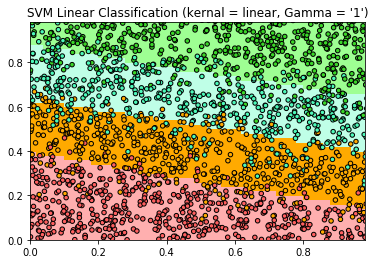

In [22]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='rbf',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [23]:
# SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf3train = clf3.score(X_train,Y_train)
        clf3test  = clf3.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.928750 Test Score : 0.902500

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.965000 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.971250 Test Score : 0.912500

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.979375 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.986875 Test Score : 0.905000

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.991250 Test Score : 0.920000

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.998125 Test Score : 0.910000

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.980625 Test Score : 0.835000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.850000

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

In [24]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [25]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 7, 10, 15, 25, 50], 'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.91.


In [27]:
# Kernalized SVM machine 
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,Y_train)))

0.95 is the accuracy of the SV Regressor


We can notice that the kernalised Support vector machine regressor gives better accuracy than the previous Linear Regressor(non kernal) SVM. Never the less one, needs to understand the data one is work on before trying out various methods. Cross validation techniques are useful.

I may futher add Cross Validation techniques for your use.

In [28]:
test = test.drop(['id'],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [29]:
test_mat = np.array(test)
test = scaler.fit_transform(test_mat)

In [30]:
clf4 = SVC(kernel='rbf',C=25,gamma=.1).fit(X_train,Y_train)
prediction = clf4.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,2
1,2
2,2
3,2
4,2


In [31]:
prediction = svr2.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,1.600995
1,1.600995
2,1.600995
3,1.600995
4,1.600995
